In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


# Read the image
image = cv2.imread('/content/drive/MyDrive/datasets/sellipi/1.jpg')

# Resize, denoise, and equalize histogram
resized_image = cv2.resize(image, (800, 593))
denoised_image = cv2.fastNlMeansDenoisingColored(resized_image, None, h=10, hColor=10)
gray_image = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY)
equalized_image = cv2.equalizeHist(gray_image)



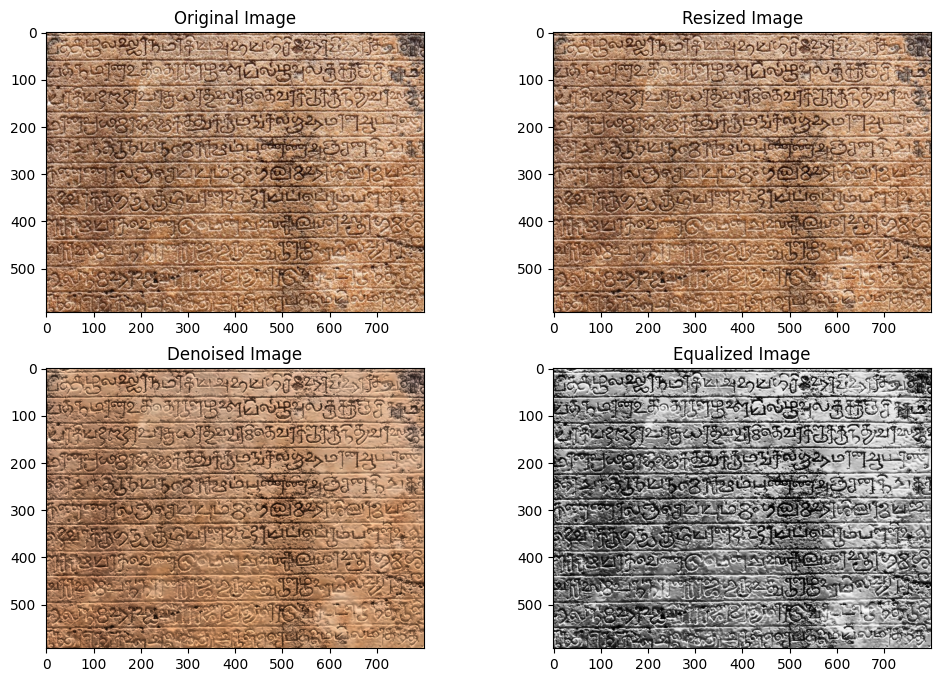

In [ ]:
# Display the original, resized, denoised, and equalized images
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
plt.title('Denoised Image')

plt.subplot(2, 2, 4)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

plt.show()

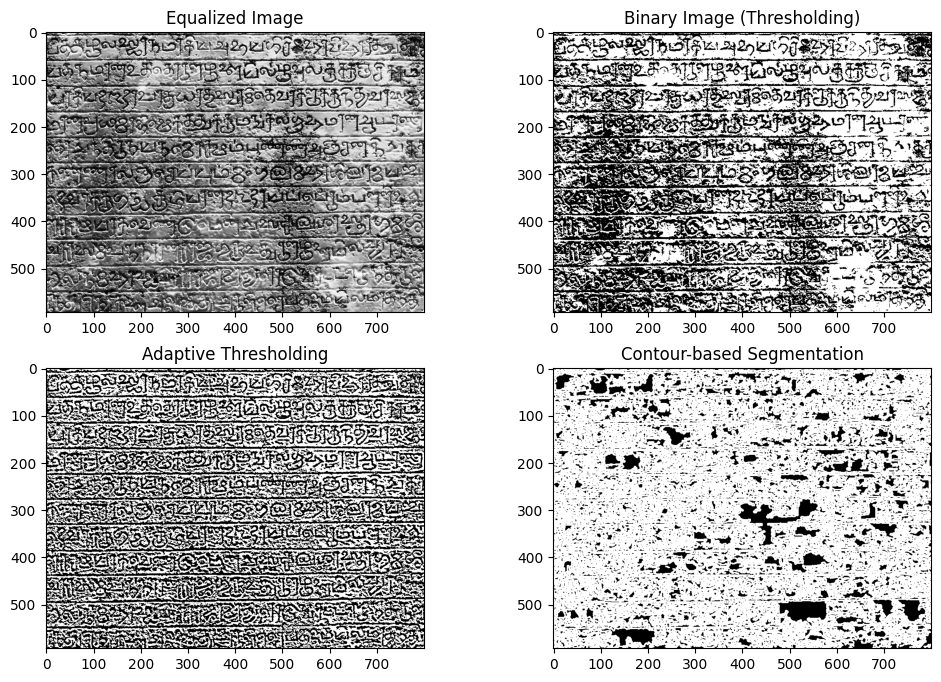

In [ ]:
# Apply segmentation techniques (e.g., thresholding, edge detection, or region-based segmentation)
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Experiment with other segmentation techniques based on the specific characteristics of Sellipi script.
# For example, you can try adaptive thresholding, edge detection, or contour-based segmentation.

# Adaptive Thresholding
adaptive_threshold = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Edge Detection (Canny)
edges = cv2.Canny(gray_image, 50, 150)

# Contour-based Segmentation
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_image = np.zeros_like(gray_image)
cv2.drawContours(contour_image, contours, -1, (255), 2)

# Display the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

plt.subplot(2, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image (Thresholding)')

plt.subplot(2, 2, 3)
plt.imshow(adaptive_threshold, cmap='gray')
plt.title('Adaptive Thresholding')

plt.subplot(2, 2, 4)
plt.imshow(contour_image, cmap='gray')
plt.title('Contour-based Segmentation')

plt.show()


In [ ]:
import cv2

# Load the input image
img = cv2.imread("/content/1sellipi.jpg")

# Pre-process the image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply thresholding to segment the text
thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find the connected components of the text
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

# Extract each character from the connected components
characters = []
for contour in contours:
    # Get the bounding rectangle of the contour
    x, y, w, h = cv2.boundingRect(contour)

    # Extract the character from the image
    character = img[y:y + h, x:x + w]

    # Append the character to the list of characters
    characters.append(character)

# Save the extracted characters to disk
for i, character in enumerate(characters):
    cv2.imwrite("character_{}.png".format(i), character)


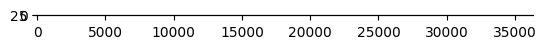

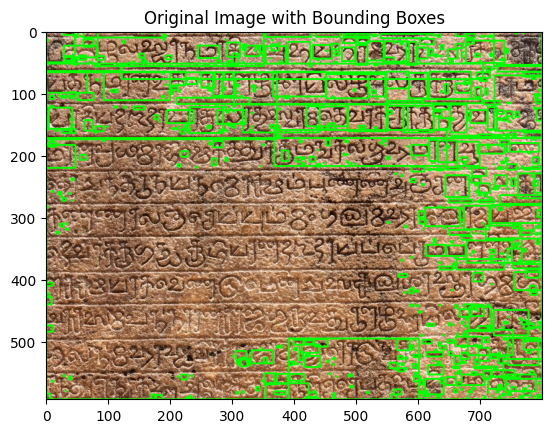

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
img = cv2.imread("/content/1sellipi.jpg")

# Create a copy of the original image for drawing bounding boxes
original_img = img.copy()

# Pre-process the image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply thresholding to segment the text
thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find the connected components of the text
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

# Extract each character from the connected components and draw bounding boxes
extracted_characters = []
standard_height = 30  # Define the standard height for all characters
for contour in contours:
    # Get the bounding rectangle of the contour
    x, y, w, h = cv2.boundingRect(contour)

    # Extract the character from the image
    character = img[y:y + h, x:x + w]

    # Resize the character to the standard height
    resized_character = cv2.resize(character, (int(w * standard_height / h), standard_height))

    # Draw a bounding box around the detected character
    cv2.rectangle(original_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Append the extracted character to the list
    extracted_characters.append(resized_character)

# Combine extracted characters into a single image
combined_characters = np.hstack(extracted_characters)

# Convert OpenCV image to RGB for Matplotlib
original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

# Display the extracted characters using Matplotlib
plt.imshow(combined_characters, cmap='gray')
plt.show()

# Display the original image with bounding boxes using OpenCV
plt.imshow(original_img_rgb)
plt.title("Original Image with Bounding Boxes")
plt.show()


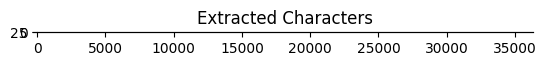

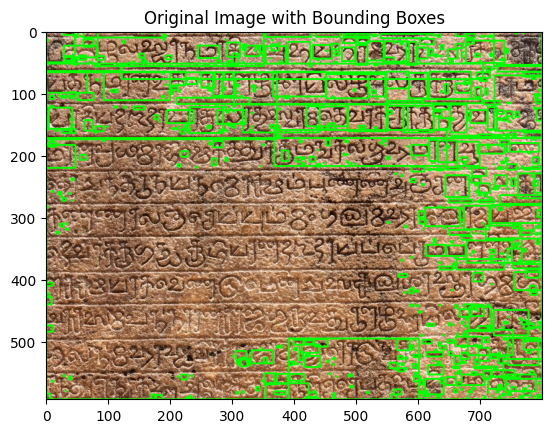

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
img = cv2.imread("/content/1sellipi.jpg")

# Create a copy of the original image for drawing bounding boxes
original_img = img.copy()

# Pre-process the image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply thresholding to segment the text
thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find the connected components of the text
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

# Extract each character from the connected components and draw bounding boxes
extracted_characters = []
standard_height = 30  # Define the standard height for all characters
for contour in contours:
    # Get the bounding rectangle of the contour
    x, y, w, h = cv2.boundingRect(contour)

    # Extract the character from the image
    character = img[y:y + h, x:x + w]

    # Resize the character to the standard height
    resized_character = cv2.resize(character, (int(w * standard_height / h), standard_height))

    # Draw a bounding box around the detected character
    cv2.rectangle(original_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Save the extracted character to a separate image
    cv2.imwrite("character_{}.png".format(i), resized_character)
    i += 1

    # Append the extracted character to the list
    extracted_characters.append(resized_character)

# Combine extracted characters into a single image
combined_characters = np.hstack(extracted_characters)

# Convert OpenCV images to RGB for Matplotlib
original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
resized_characters_rgb = []
for character in extracted_characters:
    character_rgb = cv2.cvtColor(character, cv2.COLOR_BGR2RGB)
    resized_characters_rgb.append(character_rgb)

# Display the extracted characters using Matplotlib
plt.imshow(combined_characters, cmap='gray')
plt.title("Extracted Characters")
plt.show()

# Display the original image with bounding boxes using Matplotlib
plt.imshow(original_img_rgb)
plt.title("Original Image with Bounding Boxes")
plt.show()


<ipython-input-17-550a0e4c6ac6>:58: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


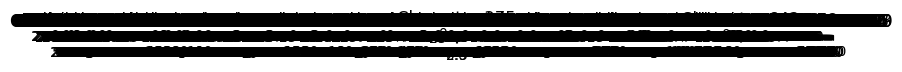

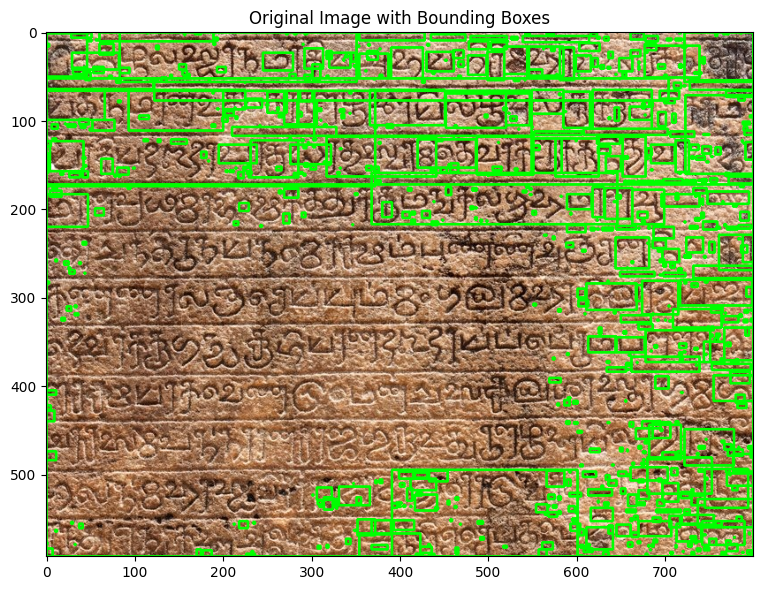

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
img = cv2.imread("/content/1sellipi.jpg")

# Create a copy of the original image for drawing bounding boxes
original_img = img.copy()

# Pre-process the image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply thresholding to segment the text
thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find the connected components of the text
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

# Extract each character from the connected components and draw bounding boxes
extracted_characters = []
standard_height = 30  # Define the standard height for all characters
for contour in contours:
    # Get the bounding rectangle of the contour
    x, y, w, h = cv2.boundingRect(contour)

    # Extract the character from the image
    character = img[y:y + h, x:x + w]

    # Resize the character to the standard height
    resized_character = cv2.resize(character, (int(w * standard_height / h), standard_height))

    # Draw a bounding box around the detected character
    cv2.rectangle(original_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Save the extracted character to a separate image
    cv2.imwrite("character_{}.png".format(i), resized_character)
    i += 1

    # Convert the character to RGB for Matplotlib
    resized_character_rgb = cv2.cvtColor(resized_character, cv2.COLOR_BGR2RGB)

    # Append the extracted character to the list
    extracted_characters.append(resized_character_rgb)

# Convert the original image to RGB for Matplotlib
original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

# Display the extracted characters using Matplotlib
plt.figure(figsize=(10, 4))

for i, character in enumerate(extracted_characters):
    plt.subplot(1, len(extracted_characters), i + 1)
    plt.imshow(character)
    plt.title("Character {}".format(i + 1))

plt.tight_layout()
plt.show()

# Display the original image with bounding boxes using Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(original_img_rgb)
plt.title("Original Image with Bounding Boxes")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the segmented image
segmented_img = cv2.imread('/content/1sellipi.jpg', cv2.IMREAD_GRAYSCALE)

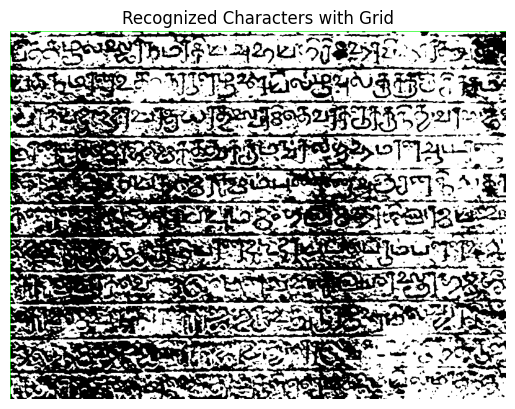

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def enhance_contrast(img):
    # Apply contrast stretching for better visibility
    return cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

def process_and_extract_characters(image_path, threshold_percentage=63):
    # a. Image processing steps
    # Load the image
    original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian blur to reduce noise
    blurred_img = cv2.GaussianBlur(original_img, (5, 5), 0)

    # Apply adaptive thresholding to create a binary image
    _, segmented_img = cv2.threshold(blurred_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # b. Segmentation Techniques
    inverted_img = cv2.bitwise_not(segmented_img)
    dilated_edges = cv2.dilate(inverted_img, None, iterations=3)
    eroded_edges = cv2.erode(dilated_edges, None, iterations=3)

    threshold_value = np.percentile(eroded_edges, threshold_percentage)
    _, binary_thresh = cv2.threshold(eroded_edges, threshold_value, 255, cv2.THRESH_BINARY)

    kernel = np.ones((3, 3), np.uint8)
    cleaned_image = cv2.morphologyEx(binary_thresh, cv2.MORPH_CLOSE, kernel, iterations=3)
    cleaned_image = cv2.morphologyEx(cleaned_image, cv2.MORPH_OPEN, kernel, iterations=3)

    # c. Character extraction and enhancement
    contours, _ = cv2.findContours(cleaned_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    min_contour_area = 720
    max_contour_area = 10000

    filtered_contours = [cnt for cnt in contours if min_contour_area < cv2.contourArea(cnt) < max_contour_area]

    result_img = cv2.cvtColor(segmented_img, cv2.COLOR_GRAY2BGR)

    bounding_boxes = [cv2.boundingRect(cnt) for cnt in filtered_contours]

    bounding_boxes.sort(key=lambda x: x[0])

    processed_boxes = []

    for x, y, w, h in bounding_boxes:
        overlap = False
        for i, (x_p, y_p, w_p, h_p) in enumerate(processed_boxes):
            if (
                (x_p <= x <= x_p + w_p) or
                (x <= x_p <= x + w) or
                (y_p <= y <= y_p + h_p) or
                (y <= y_p <= y + h)
            ):
                overlap = True
                processed_boxes[i] = (
                    min(x, x_p),
                    min(y, y_p),
                    max(x + w, x_p + w_p) - min(x, x_p),
                    max(y + h, y_p + h_p) - min(y, y_p)
                )
                break

        if not overlap:
            processed_boxes.append((x, y, w, h))

    # Check if processed_boxes is not empty before finding max_width and max_height
    if processed_boxes:
        max_width = max(box[2] for box in processed_boxes)
        max_height = max(box[3] for box in processed_boxes)
    else:
        # Provide default values or handle this case according to your needs
        max_width = 0
        max_height = 0

    grid_rows = 11  # You can adjust this as needed
    grid_cols = 30  # You can adjust this as needed

    divided_boxes = []
    for x, y, w, h in processed_boxes:
        char_width = w // grid_cols
        char_height = h // grid_rows
        for i in range(grid_cols):
            for j in range(grid_rows):
                divided_boxes.append((x + i * char_width, y + j * char_height - 5, char_width, char_height))

    # Draw grid lines on the image
    for i in range(1, grid_rows):
        y_coord = int(i * max_height / grid_rows)
        cv2.line(result_img, (0, y_coord), (result_img.shape[1], y_coord), (0, 255, 0), 1)

    for i in range(1, grid_cols):
        x_coord = int(i * max_width / grid_cols)
        cv2.line(result_img, (x_coord, 0), (x_coord, result_img.shape[0]), (0, 255, 0), 1)

    # Draw rectangles around characters
    for x, y, w, h in divided_boxes:
        cv2.rectangle(result_img, (x, y), (x + w, y + h), (0, 255, 255), 3)

    plt.imshow(result_img)
    plt.axis('off')
    plt.title(f'Recognized Characters with Grid')
    plt.show()

    characters = [segmented_img[y:y + h, x:x + w] for x, y, w, h in divided_boxes]

    contrast_stretched_characters = [enhance_contrast(char) for char in characters]

    return original_img, segmented_img, contrast_stretched_characters

# Example usage:
image_path = '/content/1sellipi.jpg'
original_img, segmented_img, extracted_characters = process_and_extract_characters(image_path)


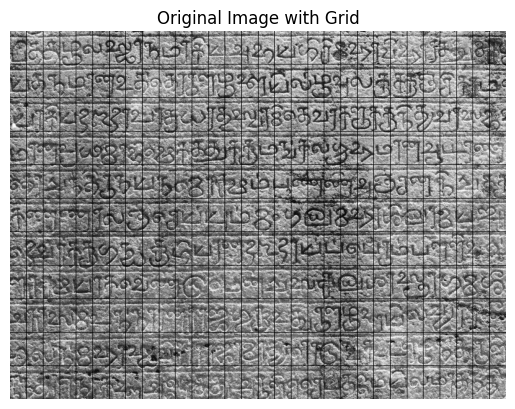

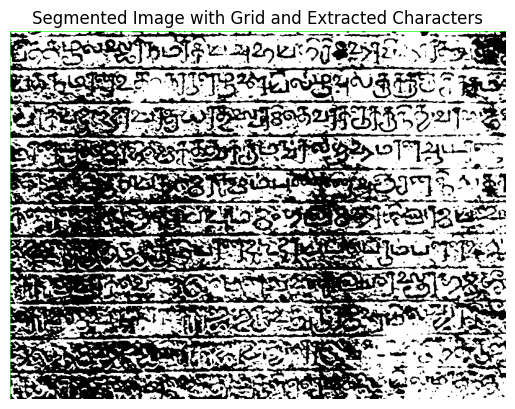

<Figure size 1500x1500 with 0 Axes>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def enhance_contrast(img):
    # Apply contrast stretching for better visibility
    return cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

def process_and_extract_characters(image_path, threshold_percentage=63):
    # a. Image processing steps
    # Load the image
    original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian blur to reduce noise
    blurred_img = cv2.GaussianBlur(original_img, (5, 5), 0)

    # Apply adaptive thresholding to create a binary image
    _, segmented_img = cv2.threshold(blurred_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # b. Segmentation Techniques
    inverted_img = cv2.bitwise_not(segmented_img)
    dilated_edges = cv2.dilate(inverted_img, None, iterations=3)
    eroded_edges = cv2.erode(dilated_edges, None, iterations=3)

    threshold_value = np.percentile(eroded_edges, threshold_percentage)
    _, binary_thresh = cv2.threshold(eroded_edges, threshold_value, 255, cv2.THRESH_BINARY)

    kernel = np.ones((3, 3), np.uint8)
    cleaned_image = cv2.morphologyEx(binary_thresh, cv2.MORPH_CLOSE, kernel, iterations=3)
    cleaned_image = cv2.morphologyEx(cleaned_image, cv2.MORPH_OPEN, kernel, iterations=3)

    # c. Character extraction and enhancement
    contours, _ = cv2.findContours(cleaned_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    min_contour_area = 720
    max_contour_area = 10000

    filtered_contours = [cnt for cnt in contours if min_contour_area < cv2.contourArea(cnt) < max_contour_area]

    result_img = cv2.cvtColor(segmented_img, cv2.COLOR_GRAY2BGR)

    bounding_boxes = [cv2.boundingRect(cnt) for cnt in filtered_contours]

    bounding_boxes.sort(key=lambda x: x[0])

    processed_boxes = []

    for x, y, w, h in bounding_boxes:
        overlap = False
        for i, (x_p, y_p, w_p, h_p) in enumerate(processed_boxes):
            if (
                (x_p <= x <= x_p + w_p) or
                (x <= x_p <= x + w) or
                (y_p <= y <= y_p + h_p) or
                (y <= y_p <= y + h)
            ):
                overlap = True
                processed_boxes[i] = (
                    min(x, x_p),
                    min(y, y_p),
                    max(x + w, x_p + w_p) - min(x, x_p),
                    max(y + h, y_p + h_p) - min(y, y_p)
                )
                break

        if not overlap:
            processed_boxes.append((x, y, w, h))

    # Check if processed_boxes is not empty before finding max_width and max_height
    if processed_boxes:
        max_width = max(box[2] for box in processed_boxes)
        max_height = max(box[3] for box in processed_boxes)
    else:
        # Provide default values or handle this case according to your needs
        max_width = 0
        max_height = 0

    grid_rows = 11  # You can adjust this as needed
    grid_cols = 30  # You can adjust this as needed

    # Draw grid lines on the original image
    for i in range(1, grid_rows):
        y_coord = int(i * original_img.shape[0] / grid_rows)
        cv2.line(original_img, (0, y_coord), (original_img.shape[1], y_coord), (0, 255, 0), 1)

    for i in range(1, grid_cols):
        x_coord = int(i * original_img.shape[1] / grid_cols)
        cv2.line(original_img, (x_coord, 0), (x_coord, original_img.shape[0]), (0, 255, 0), 1)

    divided_boxes = []
    for x, y, w, h in processed_boxes:
        char_width = w // grid_cols
        char_height = h // grid_rows
        for i in range(grid_cols):
            for j in range(grid_rows):
                divided_boxes.append((x + i * char_width, y + j * char_height - 5, char_width, char_height))

    # Draw grid lines on the segmented image
    for i in range(1, grid_rows):
        y_coord = int(i * max_height / grid_rows)
        cv2.line(result_img, (0, y_coord), (result_img.shape[1], y_coord), (0, 255, 0), 1)

    for i in range(1, grid_cols):
        x_coord = int(i * max_width / grid_cols)
        cv2.line(result_img, (x_coord, 0), (x_coord, result_img.shape[0]), (0, 255, 0), 1)

    # Draw rectangles around characters
    for x, y, w, h in divided_boxes:
        cv2.rectangle(result_img, (x, y), (x + w, y + h), (0, 255, 255), 3)

    # Display the original image with the grid
    plt.imshow(original_img, cmap='gray')
    plt.axis('off')
    plt.title(f'Original Image with Grid')
    plt.show()

    # Display the segmented image with the grid and characters
    plt.imshow(result_img)
    plt.axis('off')
    plt.title(f'Segmented Image with Grid and Extracted Characters')
    plt.show()

    # Display individual character boxes
    plt.figure(figsize=(15, 15))
    for i, (x, y, w, h) in enumerate(divided_boxes, 1):
        char_box = segmented_img[y:y + h, x:x + w]
        plt.subplot(grid_rows, grid_cols, i)
        plt.imshow(char_box, cmap='gray')
        plt.axis('off')
        plt.title(f'Box {i}')

    plt.show()

    characters = [segmented_img[y:y + h, x:x + w] for x, y, w, h in divided_boxes]

    contrast_stretched_characters = [enhance_contrast(char) for char in characters]

    return original_img, segmented_img, contrast_stretched_characters

# Example usage:
image_path = '/content/1sellipi.jpg'
original_img, segmented_img, extracted_characters = process_and_extract_characters(image_path)


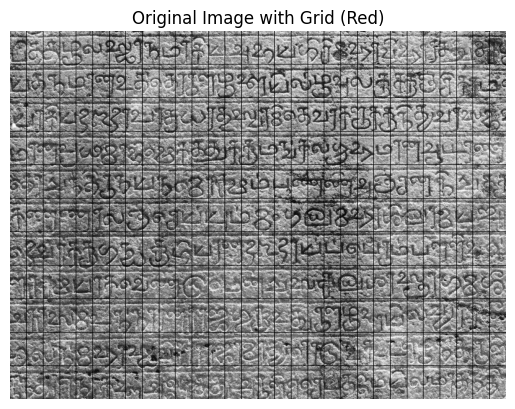

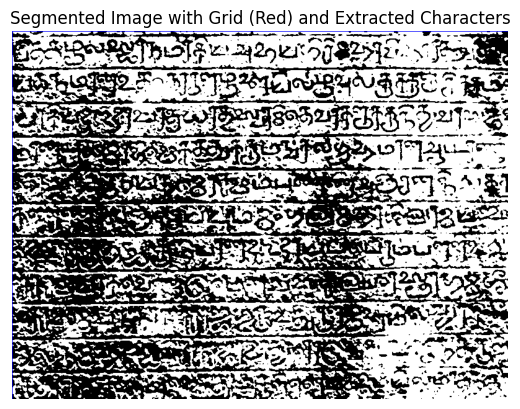

<Figure size 1500x1500 with 0 Axes>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def enhance_contrast(img):
    # Apply contrast stretching for better visibility
    return cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

def process_and_extract_characters(image_path, threshold_percentage=63):
    # a. Image processing steps
    # Load the image
    original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian blur to reduce noise
    blurred_img = cv2.GaussianBlur(original_img, (5, 5), 0)

    # Apply adaptive thresholding to create a binary image
    _, segmented_img = cv2.threshold(blurred_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # b. Segmentation Techniques
    inverted_img = cv2.bitwise_not(segmented_img)
    dilated_edges = cv2.dilate(inverted_img, None, iterations=3)
    eroded_edges = cv2.erode(dilated_edges, None, iterations=3)

    threshold_value = np.percentile(eroded_edges, threshold_percentage)
    _, binary_thresh = cv2.threshold(eroded_edges, threshold_value, 255, cv2.THRESH_BINARY)

    kernel = np.ones((3, 3), np.uint8)
    cleaned_image = cv2.morphologyEx(binary_thresh, cv2.MORPH_CLOSE, kernel, iterations=3)
    cleaned_image = cv2.morphologyEx(cleaned_image, cv2.MORPH_OPEN, kernel, iterations=3)

    # c. Character extraction and enhancement
    contours, _ = cv2.findContours(cleaned_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    min_contour_area = 720
    max_contour_area = 10000

    filtered_contours = [cnt for cnt in contours if min_contour_area < cv2.contourArea(cnt) < max_contour_area]

    result_img = cv2.cvtColor(segmented_img, cv2.COLOR_GRAY2BGR)

    bounding_boxes = [cv2.boundingRect(cnt) for cnt in filtered_contours]

    bounding_boxes.sort(key=lambda x: x[0])

    processed_boxes = []

    for x, y, w, h in bounding_boxes:
        overlap = False
        for i, (x_p, y_p, w_p, h_p) in enumerate(processed_boxes):
            if (
                (x_p <= x <= x_p + w_p) or
                (x <= x_p <= x + w) or
                (y_p <= y <= y_p + h_p) or
                (y <= y_p <= y + h)
            ):
                overlap = True
                processed_boxes[i] = (
                    min(x, x_p),
                    min(y, y_p),
                    max(x + w, x_p + w_p) - min(x, x_p),
                    max(y + h, y_p + h_p) - min(y, y_p)
                )
                break

        if not overlap:
            processed_boxes.append((x, y, w, h))

    # Check if processed_boxes is not empty before finding max_width and max_height
    if processed_boxes:
        max_width = max(box[2] for box in processed_boxes)
        max_height = max(box[3] for box in processed_boxes)
    else:
        # Provide default values or handle this case according to your needs
        max_width = 0
        max_height = 0

    grid_rows = 11  # You can adjust this as needed
    grid_cols = 30  # You can adjust this as needed

    # Draw grid lines on the original image (in red)
    for i in range(1, grid_rows):
        y_coord = int(i * original_img.shape[0] / grid_rows)
        cv2.line(original_img, (0, y_coord), (original_img.shape[1], y_coord), (0, 0, 255), 1)

    for i in range(1, grid_cols):
        x_coord = int(i * original_img.shape[1] / grid_cols)
        cv2.line(original_img, (x_coord, 0), (x_coord, original_img.shape[0]), (0, 0, 255), 1)

    divided_boxes = []
    for x, y, w, h in processed_boxes:
        char_width = w // grid_cols
        char_height = h // grid_rows
        for i in range(grid_cols):
            for j in range(grid_rows):
                divided_boxes.append((x + i * char_width, y + j * char_height - 5, char_width, char_height))

    # Draw grid lines on the segmented image (in red)
    for i in range(1, grid_rows):
        y_coord = int(i * max_height / grid_rows)
        cv2.line(result_img, (0, y_coord), (result_img.shape[1], y_coord), (0, 0, 255), 1)

    for i in range(1, grid_cols):
        x_coord = int(i * max_width / grid_cols)
        cv2.line(result_img, (x_coord, 0), (x_coord, result_img.shape[0]), (0, 0, 255), 1)

    # Draw rectangles around characters
    for x, y, w, h in divided_boxes:
        cv2.rectangle(result_img, (x, y), (x + w, y + h), (0, 255, 255), 3)

    # Display the original image with the grid
    plt.imshow(original_img, cmap='gray')
    plt.axis('off')
    plt.title(f'Original Image with Grid (Red)')
    plt.show()

    # Display the segmented image with the grid and characters
    plt.imshow(result_img)
    plt.axis('off')
    plt.title(f'Segmented Image with Grid (Red) and Extracted Characters')
    plt.show()

    # Display individual character boxes
    plt.figure(figsize=(15, 15))
    for i, (x, y, w, h) in enumerate(divided_boxes, 1):
        char_box = segmented_img[y:y + h, x:x + w]
        plt.subplot(grid_rows, grid_cols, i)
        plt.imshow(char_box, cmap='gray')
        plt.axis('off')
        plt.title(f'Box {i}')

    plt.show()

    # Extract and display each box separately
    for i, (x, y, w, h) in enumerate(divided_boxes, 1):
        box_img = original_img[y:y + h, x:x + w]

        # Display the box with its grid
        plt.imshow(box_img, cmap='gray')
        plt.axis('off')
        plt.title(f'Box {i} with Grid (Red)')
        plt.show()

    characters = [segmented_img[y:y + h, x:x + w] for x, y, w, h in divided_boxes]

    contrast_stretched_characters = [enhance_contrast(char) for char in characters]

    return original_img, segmented_img, contrast_stretched_characters

# Example usage:
image_path = '/content/1sellipi.jpg'
original_img, segmented_img, extracted_characters = process_and_extract_characters(image_path)
